### Histograms of some key properties:

- CME PA 
- CME Width 
- CME Speed 
- GOES Peak Flare Flux
- SRS No. Sunspots 
- SRS Total Area 

In [9]:
# Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)

In [4]:
# Defining the path for the dataframe
custom_df = 'C:/Users/Peter/py_projects/solar_stats/custom_df.p'

# Importing the dataframe
df = pd.read_pickle(custom_df)

In [5]:
# CME data
dfc = df[['cme_width', 'cme_angle', 'cme_speed']]

# Removing the rows containing any NaN values
dfc = dfc.dropna(how='any')

# Reindexing
dfc = dfc.reset_index(drop=True)

#==================================================================================================================

# SRS data
dfs = df[['srs_no_spots', 'srs_area']]

# Putting the GOES flux in a separate df because it contains significantly more entries
glux = df[['goes_flux']]

# There are some zero values in area and spot column ---> converting to NaNs and removing those rows
dfs['srs_area'].replace(0, np.nan, regex=True)

# Removing the rows containing any NaN values
dfs = dfs.dropna(how='any')
glux = glux.dropna(how='any')

# Reindexing
dfs = dfs.reset_index(drop=True)
glux = glux.reset_index(drop=True)

# srs_area and srs_no_spots columns are objects --> converting to a float
dfs['srs_area'] = dfs['srs_area'].astype(float)
dfs['srs_no_spots'] = dfs['srs_no_spots'].astype(float)

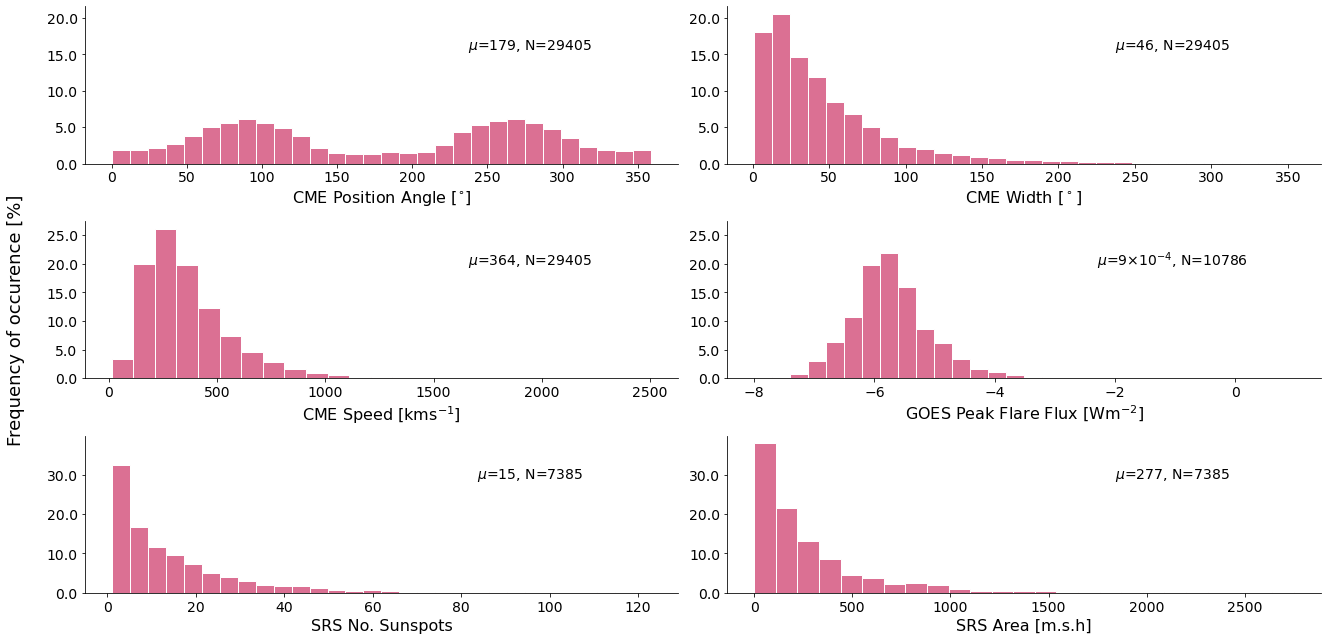

In [11]:
# Plotting
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(18, 9), sharey='row', facecolor='white')

# CME PA
ax1.hist(dfc['cme_angle'], edgecolor='white', align='mid', color='palevioletred',
         weights=np.ones(len(dfc['cme_angle'])) / len(dfc['cme_angle']),
         bins=30)
ax1.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))


ax1.set_xlabel('CME Position Angle [$^{\circ}$]', fontsize=16)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)
#1ax1.set_title(r'$\mu$=179, N=29405')
ax1.text(0.75,0.75, r'$\mu$=179, N=29405', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax1.transAxes)

# CME width
ax2.hist(dfc['cme_width'], edgecolor='white', align='mid', color='palevioletred',
         weights=np.ones(len(dfc['cme_width'])) / len(dfc['cme_width']),
         bins=30)
ax2.yaxis.set_tick_params(labelleft=True)
ax2.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax2.set_xlabel('CME Width [$^\circ$]', fontsize=16)
ax2.spines['right'].set_visible(False)
ax2.spines['top'].set_visible(False)
#ax2.set_title(r'$\mu$=46, N=29405')
ax2.text(0.75,0.75, r'$\mu$=46, N=29405', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax2.transAxes)

# CME speed
ax3.hist(dfc['cme_speed'], edgecolor='white', align='mid', color='palevioletred',
         weights=np.ones(len(dfc['cme_speed'])) / len(dfc['cme_speed']),
         bins=25)
ax3.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax3.set_xlabel('CME Speed [kms$^{-1}$]', fontsize=16)
ax3.spines['right'].set_visible(False)
ax3.spines['top'].set_visible(False)
#ax3.set_title(r'$\mu$=364, N=29405')
ax3.text(0.75,0.75, r'$\mu$=364, N=29405', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax3.transAxes)

# GOES flux
ax4.hist(np.log10(glux['goes_flux']), edgecolor='white', align='mid', color='palevioletred',
         weights=np.ones(len(glux['goes_flux'])) / len(glux['goes_flux']),
         bins=30)
ax4.yaxis.set_tick_params(labelleft=True)
ax4.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax4.set_xlabel('GOES Peak Flare Flux [Wm$^{-2}$]', fontsize=16)
ax4.spines['right'].set_visible(False)
ax4.spines['top'].set_visible(False)
#ax4.set_title(r'$\mu$=8.89$\times$10$^{-4}$, N=10786')
ax4.text(0.75,0.75, r'$\mu$=9$\times$10$^{-4}$, N=10786', verticalalignment='center', horizontalalignment='center', 
         fontsize=14, transform=ax4.transAxes)

# SRS spots
ax5.hist(dfs['srs_no_spots'], edgecolor='white', align='mid', color='palevioletred',
         weights=np.ones(len(dfs['srs_no_spots'])) / len(dfs['srs_no_spots']),
         bins=30)
ax5.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax5.set_xlabel('SRS No. Sunspots', fontsize=16)
ax5.spines['right'].set_visible(False)
ax5.spines['top'].set_visible(False)
#ax5.set_title(r'$\mu$=15, N=7385')
ax5.text(0.75,0.75, r'$\mu$=15, N=7385', fontsize=14, verticalalignment='center', horizontalalignment='center', 
         transform=ax5.transAxes)

# SRS area
ax6.hist(dfs['srs_area'], edgecolor='white', align='mid', color='palevioletred',
         weights=np.ones(len(dfs['srs_area'])) / len(dfs['srs_area']),
         bins=25)
ax6.yaxis.set_major_formatter(ticker.PercentFormatter(1, symbol=''))
ax6.set_xlabel('SRS Area [m.s.h]', fontsize=16)
ax6.yaxis.set_tick_params(labelleft=True)
ax6.spines['right'].set_visible(False)
ax6.spines['top'].set_visible(False)
#ax6.set_title(r'$\mu$=277, N=7385')
ax6.text(0.75,0.75, r'$\mu$=277, N=7385', verticalalignment='center', horizontalalignment='center', 
         fontsize=14, transform=ax6.transAxes)

fig.text(-0.022, 0.5, 'Frequency of occurence [%]', va='center', rotation='vertical', fontsize=18)

plt.setp(ax1.get_xticklabels(), fontsize=14)
plt.setp(ax1.get_yticklabels(), fontsize=14)
plt.setp(ax2.get_xticklabels(), fontsize=14)
plt.setp(ax2.get_yticklabels(), fontsize=14)
plt.setp(ax3.get_xticklabels(), fontsize=14)
plt.setp(ax3.get_yticklabels(), fontsize=14)
plt.setp(ax4.get_xticklabels(), fontsize=14)
plt.setp(ax4.get_yticklabels(), fontsize=14)
plt.setp(ax5.get_xticklabels(), fontsize=14)
plt.setp(ax5.get_yticklabels(), fontsize=14)
plt.setp(ax6.get_xticklabels(), fontsize=14)
plt.setp(ax6.get_yticklabels(), fontsize=14)

plt.tight_layout()
#plt.savefig('cme_hists.png', dpi=300, bbox_inches='tight', pad_inches=0.1)
plt.show()